# Introduction to Dataset

In [1]:
## Import the important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [2]:
## Load Dataset
data = pd.read_csv(r'starcraft_player_data.csv')
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


### Exploratory Data Analysis (EDA)

In [3]:
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [4]:
## Checking if there are any null values
data.isnull().sum() 

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [6]:
# We do have missing or unkown value
data.tail() 

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


<h3> Data Preprocessing </h3>

In [7]:
# Convert the columns to numeric (if they are not already)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['TotalHours'] = pd.to_numeric(data['TotalHours'], errors='coerce')
data['HoursPerWeek'] = pd.to_numeric(data['HoursPerWeek'], errors='coerce')

# Inpute missing values with median and max for total_hours and hours_per_week
median_age = data['Age'].median()
max_total_hours = data['TotalHours'].max()
max_hours_per_week = data['HoursPerWeek'].max()

data['Age'].fillna(median_age, inplace=True)
data['TotalHours'].fillna(max_total_hours, inplace=True)
data['HoursPerWeek'].fillna(max_hours_per_week, inplace=True)
data=data.dropna()  ## If there are any null values (As we know we dont have it but still to be safe)
data.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,21.0,168.0,1000000.0,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,21.0,168.0,1000000.0,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,21.0,168.0,1000000.0,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,21.0,168.0,1000000.0,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,21.0,168.0,1000000.0,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


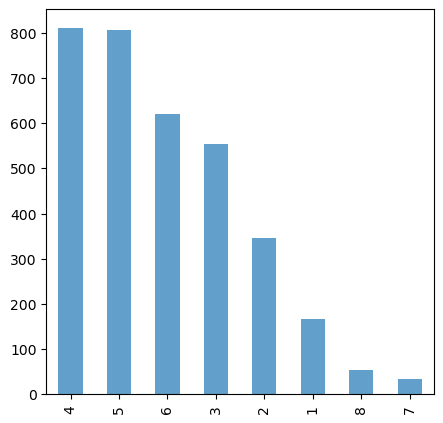

In [8]:
## Data visualization
data['LeagueIndex'].value_counts().plot(kind='bar',alpha=0.7,figsize=(5,5))
plt.show()


In [9]:
## We have columns with relationship
data['hours_played_per_day'] = data['HoursPerWeek'] / 7


In [10]:
data['HotKeysUsage'] = (data['SelectByHotkeys'] + data['AssignToHotkeys'] + data['UniqueHotkeys']) * data['LeagueIndex']


In [11]:
data['Performance'] = data['NumberOfPACs'] * data['GapBetweenPACs'] * data['ActionLatency'] * data['ActionsInPAC']

In [12]:
data['MapData'] = data['MinimapAttacks'] + data['MinimapRightClicks'] + data['TotalMapExplored']
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,hours_played_per_day,HotKeysUsage,Performance,MapData
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7,0.000110,...,4.7508,28,0.001397,6,0.0,0.000000,1.428571,35.018674,30.755069,28.000502
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4,0.000294,...,4.8434,22,0.001193,5,0.0,0.000208,1.428571,20.017816,29.079695,22.000726
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,4,0.000294,...,4.0430,22,0.000745,6,0.0,0.000189,1.428571,16.005747,39.796948,22.000755
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,1,0.000053,...,4.9155,19,0.000426,7,0.0,0.000384,2.857143,3.003740,29.194166,19.000597
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,2,0.000000,...,9.3740,15,0.001174,4,0.0,0.000019,1.428571,6.004390,31.270019,15.001329


<h2> Selecting Important Features </h2>

In [13]:
x = data.drop(['LeagueIndex', 'GameID','ComplexUnitsMade','ComplexAbilitiesUsed'], axis=1)

y = data['LeagueIndex']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=48)

# Perform feature scaling on the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)


<h2> Logistic Model </h2>

In [14]:
# Train a logistic regression model
model = LogisticRegression()
model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, ytrain)
y_pred = model.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(ytest, y_pred)*100)
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))
print("Classification Report:")
print(classification_report(ytest, y_pred))


Accuracy Score: 84.38880706921944
Confusion Matrix:
[[ 15  11   1   0   0   0   0   0]
 [  8  44  17   1   0   0   0   0]
 [  1   5  90  11   0   0   0   0]
 [  0   1   5 143   7   0   0   0]
 [  0   0   1  21 139   1   0   1]
 [  0   0   0   1   6 132   2   0]
 [  0   0   0   0   0   5   1   0]
 [  0   0   0   0   0   0   0   9]]
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.56      0.59        27
           2       0.72      0.63      0.67        70
           3       0.79      0.84      0.81       107
           4       0.81      0.92      0.86       156
           5       0.91      0.85      0.88       163
           6       0.96      0.94      0.95       141
           7       0.33      0.17      0.22         6
           8       0.90      1.00      0.95         9

    accuracy                           0.84       679
   macro avg       0.76      0.74      0.74       679
weighted avg       0.84      0.84      0.84     